In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.common.alert import Alert

In [3]:
# 경고창 숨기기
import warnings
warnings.filterwarnings(action='ignore')

# 역대 영화 파일 불러오기

In [4]:
df = pd.read_excel('./reviewdata/KOBIS_역대_박스오피스(통합전산망_집계_기준)_2023-05-10.xlsx', engine='openpyxl', header=4)
df

,순위,영화명,개봉일,매출액,관객수,스크린수,상영횟수,대표국적,국적,배급사
0,1,명량,2014-07-30,135758658810,17615919,1587,188726,한국,한국,(주)씨제이이엔엠
1,2,극한직업,2019-01-23,139655543516,16266338,2003,292816,한국,한국,(주)씨제이이엔엠
2,3,신과함께-죄와 벌,2017-12-20,115727528087,14414658,1912,214631,한국,한국,롯데쇼핑㈜롯데엔터테인먼트
3,4,국제시장,2014-12-17,110947621230,14264478,1044,212705,한국,한국,(주)씨제이이엔엠
4,5,어벤져스: 엔드게임,2019-04-24,122492181020,13977602,2835,246433,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
...,...,...,...,...,...,...,...,...,...,...
196,197,비긴 어게인,2014-08-13,27433947031,3479444,525,87565,미국,미국,판씨네마(주)
197,198,태풍,2005-12-14,22209675300,3471150,481,47155,한국,한국,CJ ENM
198,199,킹콩,2005-12-14,21476688172,3470059,319,38456,미국,미국,UIP코리아
199,200,부러진 화살,2012-01-18,25938096000,3460212,530,71607,한국,한국,(주)넥스트엔터테인먼트월드(NEW)


In [5]:
df.drop([200], axis=0, inplace=True)

# 역대 영화명 추출

In [6]:
mlist = df['영화명']
mlist

0               명량
1             극한직업
2        신과함께-죄와 벌
3             국제시장
4       어벤져스: 엔드게임
          ...     
195    해리 포터와 불의 잔
196         비긴 어게인
197             태풍
198             킹콩
199         부러진 화살
Name: 영화명, Length: 200, dtype: object

# 영화명 검색

In [12]:
base_url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query='
driver = webdriver.Chrome()
driver.get(base_url)

In [13]:
sup_url = f'영화+{mlist[1]}+평점'
url = base_url + sup_url
driver.get(url)
req = requests.get(url)
soup = BeautifulSoup(req.text, 'html.parser')

In [57]:
# driver.find_element(By.XPATH, '//*[@id="nx_query"]').click()
# time.sleep(1)

# webdriver.ActionChains(driver).key_down(Keys.CONTROL).send_keys("a").perform()
# time.sleep(1)


# driver.find_element(By.XPATH, '//*[@id="nx_query"]').send_keys(f'{mlist[0]} 평점' + Keys.ENTER)
# time.sleep(1)

In [15]:
# 영화명
mname = mlist[1]
mname

'극한직업'

# 평점

In [16]:
# 전체 평점
tot_score = float(soup.select('.area_star_number')[0].get_text())
tot_score

9.2

In [17]:
# 남자 평점
man_score = float(soup.select('.area_star_number')[1].get_text())
man_score

9.16

In [18]:
# 여자 평점
girl_score = float(soup.select('.area_star_number')[2].get_text())
girl_score

9.24

# 나이별 만족도

In [19]:
# 10대 만족도
age10 = soup.select('.area_graph_age > li')[0].select('.area_text_age')[0].get_text()
age10_score = float(soup.select('.area_graph_age > li')[0].select('.this_text_num')[0].get_text())
print(age10, age10_score)

10대 9.43


In [20]:
# 20대 만족도
age20 = soup.select('.area_graph_age > li')[1].select('.area_text_age')[0].get_text()
age20_score = float(soup.select('.area_graph_age > li')[1].select('.this_text_num')[0].get_text())
print(age20, age20_score)

20대 9.32


In [21]:
# 30대 만족도
age30 = soup.select('.area_graph_age > li')[2].select('.area_text_age')[0].get_text()
age30_score = float(soup.select('.area_graph_age > li')[2].select('.this_text_num')[0].get_text())
print(age30, age30_score)

30대 9.22


In [22]:
# 40대 만족도
age40 = soup.select('.area_graph_age > li')[3].select('.area_text_age')[0].get_text()
age40_score = float(soup.select('.area_graph_age > li')[3].select('.this_text_num')[0].get_text())
print(age40, age40_score)

40대 9.09


In [23]:
# 50대 만족도
age50 = soup.select('.area_graph_age > li')[4].select('.area_text_age')[0].get_text()
age50_score = float(soup.select('.area_graph_age > li')[4].select('.this_text_num')[0].get_text())
print(age50, age50_score)

50대 8.82


# 평점 리뷰 긁기(공감순-상위 20개)

In [24]:
time.sleep(1)
driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[2]/div[2]/div/div[2]/div[2]/div/div[1]/ul/li[2]/a').click()

time.sleep(1)
driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[2]/div[2]/div/div[2]/div[4]/div/div/div/div/ul/li[1]/a').click()

time.sleep(1)
driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[2]/div[2]/div/div[2]/div[6]').click()

for i in range(7):
    webdriver.ActionChains(driver).send_keys(Keys.PAGE_DOWN).perform()
    time.sleep(1)

In [25]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

<html data-platform="win32" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/112.0.0.0 safari/537.36" lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="영화 극한직업 평점 : 네이버 통합검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'영화 극한직업 평점'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'영화 극한직업 평점'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>영화 극한직업 평점 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription
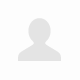
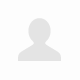

In [26]:
soup

In [27]:
# 리뷰 20개 미만 처리
min = len(soup.select('.area_card_outer._item_wrapper > li'))
min

30

In [28]:
soup.select('.area_card_outer._item_wrapper > li > .area_review_content > div')[0].select('.desc')[0].get_text()

'진짜 뻥안치고 ㅈㄴ 웃겼다 '

In [29]:
soup.select('.area_card_outer._item_wrapper > li .area_text_box')[0].get_text().split(')')[1]

'10'

In [30]:
review_list = []

try:
    for cnt in range(0,20):
        rev = soup.select('.area_card_outer._item_wrapper > li > .area_review_content > div')[cnt].select('.desc')[0].get_text()
        rev_score = int(soup.select('.area_card_outer._item_wrapper > li .area_text_box')[cnt].get_text().split(')')[1])
        review_list.append(rev_score)
        review_list.append(rev)
except:
    for cnt in range(0,min):
        rev = soup.select('.area_card_outer._item_wrapper > li > .area_review_content > div')[cnt].select('.desc')[0].get_text()
        rev_score = int(soup.select('.area_card_outer._item_wrapper > li .area_text_box')[cnt].get_text().split(')')[1])
        review_list.append(rev_score)
        review_list.append(rev)
review_list

[10,
 '진짜 뻥안치고 ㅈㄴ 웃겼다 ',
 10,
 '계속 웃으면서 봤어요!"지금까지 이런맛은 없었다이것은 갈비인가 통닭인가수원왕갈비통닭입니다."이 대사가 귓가에 계속 맴도네요 ㅎㅎ ',
 10,
 '완전 내스타일.. 류승룡 영화 요즘 말아먹더니 이번엔 대박 웃기네 ㅋㅋ역시 갓승룡 ',
 9,
 '자꾸 광고할떄 치킨치킨 거리길래 뭔말인가 했더만..ㅋㅋㅋ치킨먹고싶네 ',
 10,
 '올해 가장 재미있었다 아직까진 ',
 10,
 'ㅠㅠ진짜웃곀ㅋㅋㅋ 또볼꺼야ㅠㅠㅠ ',
 8,
 '신선하고 재밌었습니다! ',
 8,
 '엄마랑 재밌게 봤어요 시간 후딱가요 ',
 10,
 '생각보다 너무 재미있었습니다 진선규님 코믹연기도 너무 잘하셔서 놀랐네요 ',
 8,
 '재밌게 봤습니다 웃음코드가 빵빵떠지네요 ',
 2,
 '초딩 유머코드 초딩 혼자 웃고 ',
 10,
 '캐릭터 다 너무 귀여웠고 엄텅 재밋엇숩니다!! ',
 10,
 '진짜 장르 애매하게 가다 어중이떠중이 되는 경찰물들 많은데 이건 정말 첨부터 끝까지 조오오오오온나 웃깁니다 ',
 10,
 '웃고 싶을때마다 보는데 매번 웃기는 최애 영화. ',
 9,
 '각자 역할이 진짜인듯..영화프로그램에서 조금만 보여주었으면 좋겠어요그 다음 상황을 알고보니 재미가 좀 떨어졌어요.. ',
 10,
 '맘껏 웃었어요~~이하늬배우 넘 찰지게 욕 잘함, 진선규배우!!!! 연기갑!!! ',
 8,
 '재밌어요ㅋㅋ 형사캐릭터 전부 다 차별화되서 웃김진선규랑 공명ㅋㅋㅋ ',
 10,
 '다섯번은넘게본듯배우들너무찰지게웃겨요 ',
 10,
 '안 아파~ 안 아파~ 웃다가 숨넘어갈뻔 ',
 9,
 '재밌었음 아무생각없이 재밌게보고옴 ']

In [31]:
print(review_list[0], review_list[1])

10 진짜 뻥안치고 ㅈㄴ 웃겼다 


# 추출한 값 넣기

In [43]:
data = pd.DataFrame(columns = ['영화명', '관람객 평점', '남자 평점', '여자 평점', '10대 평점', '20대 평점', '30대 평점',
  '40대 평점', '50대 평점', '리뷰 평점', '리뷰'])
new_row = pd.DataFrame({'영화명':[mname], '관람객 평점':[tot_score],
           '남자 평점':[man_score], '여자 평점':[girl_score],
           '10대 평점':[age10_score], '20대 평점':[age20_score],
           '30대 평점':[age30_score], '40대 평점':[age40_score],
           '50대 평점':[age50_score], '리뷰 평점':[review_list[0]], '리뷰':[review_list[1]]})
# data = data.append(new_row, ignore_index=True)
data = pd.concat([data, new_row], axis=0)
data

,영화명,관람객 평점,남자 평점,여자 평점,10대 평점,20대 평점,30대 평점,40대 평점,50대 평점,리뷰 평점,리뷰
0,극한직업,9.2,9.16,9.24,9.43,9.32,9.22,9.09,8.82,10,진짜 뻥안치고 ㅈㄴ 웃겼다


In [33]:
data = pd.DataFrame(columns = ['영화명', '관람객 평점', '남자 평점', '여자 평점', '10대 평점', '20대 평점', '30대 평점',
  '40대 평점', '50대 평점', '리뷰 평점', '리뷰'])
data

,영화명,관람객 평점,남자 평점,여자 평점,10대 평점,20대 평점,30대 평점,40대 평점,50대 평점,리뷰 평점,리뷰


In [45]:
for cnt in range(0,20):
    rev = soup.select('.area_card_outer._item_wrapper > li > .area_review_content > div')[cnt].select('.desc')[0].get_text()
    rev_score = int(soup.select('.area_card_outer._item_wrapper > li .area_text_box')[cnt].get_text().split(')')[1])
    new_row = pd.DataFrame({'영화명':[mname], '관람객 평점':[tot_score],
           '남자 평점':[man_score], '여자 평점':[girl_score],
           '10대 평점':[age10_score], '20대 평점':[age20_score],
           '30대 평점':[age30_score], '40대 평점':[age40_score],
           '50대 평점':[age50_score], '리뷰 평점':[rev_score], '리뷰':[rev]})
    data = pd.concat([data, new_row], axis=0)
data

,영화명,관람객 평점,남자 평점,여자 평점,10대 평점,20대 평점,30대 평점,40대 평점,50대 평점,리뷰 평점,리뷰
0,극한직업,9.2,9.16,9.24,9.43,9.32,9.22,9.09,8.82,10,진짜 뻥안치고 ㅈㄴ 웃겼다
0,극한직업,9.2,9.16,9.24,9.43,9.32,9.22,9.09,8.82,10,진짜 뻥안치고 ㅈㄴ 웃겼다
0,극한직업,9.2,9.16,9.24,9.43,9.32,9.22,9.09,8.82,10,"계속 웃으면서 봤어요!""지금까지 이런맛은 없었다이것은 갈비인가 통닭인가수원왕갈비통닭..."
0,극한직업,9.2,9.16,9.24,9.43,9.32,9.22,9.09,8.82,10,완전 내스타일.. 류승룡 영화 요즘 말아먹더니 이번엔 대박 웃기네 ㅋㅋ역시 갓승룡
0,극한직업,9.2,9.16,9.24,9.43,9.32,9.22,9.09,8.82,9,자꾸 광고할떄 치킨치킨 거리길래 뭔말인가 했더만..ㅋㅋㅋ치킨먹고싶네
0,극한직업,9.2,9.16,9.24,9.43,9.32,9.22,9.09,8.82,10,올해 가장 재미있었다 아직까진
0,극한직업,9.2,9.16,9.24,9.43,9.32,9.22,9.09,8.82,10,ㅠㅠ진짜웃곀ㅋㅋㅋ 또볼꺼야ㅠㅠㅠ
0,극한직업,9.2,9.16,9.24,9.43,9.32,9.22,9.09,8.82,8,신선하고 재밌었습니다!
0,극한직업,9.2,9.16,9.24,9.43,9.32,9.22,9.09,8.82,8,엄마랑 재밌게 봤어요 시간 후딱가요
0,극한직업,9.2,9.16,9.24,9.43,9.32,9.22,9.09,8.82,10,생각보다 너무 재미있었습니다 진선규님 코믹연기도 너무 잘하셔서 놀랐네요


# 런타임

In [46]:
time.sleep(1)
driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[1]/div[3]/div/div/ul/li[2]/a').click()

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')


In [47]:
soup.select('.detail_info > dl')[0].select('div')[4].get_text().strip().split(' ')[1]

'111분'

# 역대 TOP 200

In [8]:
data = pd.DataFrame(columns = ['영화명', '개봉일', '런타임', '관람객 평점', '남자 평점', '여자 평점',
                               '10대 평점', '20대 평점', '30대 평점', '40대 평점', '50대 평점',
                               '리뷰 평점', '리뷰'])

base_url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query='
driver = webdriver.Chrome()
driver.get(base_url)

ec = 0

for top in range(0, 200):
    try:
        sup_url = f'영화+{mlist[top]}+평점'
        url = base_url + sup_url
        driver.get(url)
        req = requests.get(url)
        soup = BeautifulSoup(req.text, 'html.parser')

        # 영화명
        mname = str(mlist[top])
        print(f'{top+1}위 {mname}')

        # 기본정보 클릭
        time.sleep(0.3)
        driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[1]/div[3]/div/div/ul/li[2]/a').click()

        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        
        # 개봉일
        date = soup.select('.detail_info > dl')[0].select('div')[0].get_text().strip().split(' ')[1]
        print(date)
        
        # 러닝타임
        runtime = soup.select('.detail_info > dl')[0].select('div')[4].get_text().strip().split(' ')[1]
        
        # 평점 클릭
        time.sleep(0.3)
        driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[1]/div[3]/div/div/ul/li[4]/a').click()
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        
        # 전체 평점
        tot_score = float(soup.select('.area_star_number')[0].get_text())
        # 남자 평점
        man_score = float(soup.select('.area_star_number')[1].get_text())
        # 여자 평점
        girl_score = float(soup.select('.area_star_number')[2].get_text())

        # 10대 만족도
        age10_score = float(soup.select('.area_graph_age > li')[0].select('.this_text_num')[0].get_text())
        # 20대 만족도
        age20_score = float(soup.select('.area_graph_age > li')[1].select('.this_text_num')[0].get_text())
        # 30대 만족도
        age30_score = float(soup.select('.area_graph_age > li')[2].select('.this_text_num')[0].get_text())
        # 40대 만족도
        age40_score = float(soup.select('.area_graph_age > li')[3].select('.this_text_num')[0].get_text())
        # 50대 만족도
        age50_score = float(soup.select('.area_graph_age > li')[4].select('.this_text_num')[0].get_text())

        # 공감순 리뷰 페이지 내리기
        time.sleep(0.3)
        driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[2]/div[2]/div/div[2]/div[2]/div/div[1]/ul/li[2]/a').click()

        time.sleep(0.3)
        driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[2]/div[2]/div/div[2]/div[4]/div/div/div/div/ul/li[1]/a').click()

        time.sleep(0.3)
        driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[2]/div[2]/div/div[2]/div[6]').click()

        for i in range(7):
            webdriver.ActionChains(driver).send_keys(Keys.PAGE_DOWN).perform()
            time.sleep(0.3)

        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        time.sleep(0.3)
        
        # 리뷰 20개 미만 처리
        min = len(soup.select('.area_card_outer._item_wrapper > li'))
        
        # 상위 리뷰 20개 추출
        if min >= 20:
            try:
                for cnt in range(0,20):
                    rev = soup.select('.area_card_outer._item_wrapper > li > .area_review_content > div')[cnt].select('.desc')[0].get_text()
                    rev_score = int(soup.select('.area_card_outer._item_wrapper > li .area_text_box')[cnt].get_text().split(')')[1])
                    new_row = pd.DataFrame({'영화명':[mname], '개봉일':[date], '런타임':[runtime], '관람객 평점':[tot_score],
                           '남자 평점':[man_score], '여자 평점':[girl_score],
                           '10대 평점':[age10_score], '20대 평점':[age20_score],
                           '30대 평점':[age30_score], '40대 평점':[age40_score],
                           '50대 평점':[age50_score], '리뷰 평점':[rev_score], '리뷰':[rev]})
                    data = pd.concat([data, new_row], axis=0)
                time.sleep(0.3)
                print(f'댓글 : {cnt+1}개')
            except:
                continue
        else:
            try:
                for cnt in range(0,min):
                    rev = soup.select('.area_card_outer._item_wrapper > li > .area_review_content > div')[cnt].select('.desc')[0].get_text()
                    rev_score = int(soup.select('.area_card_outer._item_wrapper > li .area_text_box')[cnt].get_text().split(')')[1])
                    new_row = pd.DataFrame({'영화명':[mname], '개봉일':[date], '런타임':[runtime], '관람객 평점':[tot_score],
                           '남자 평점':[man_score], '여자 평점':[girl_score],
                           '10대 평점':[age10_score], '20대 평점':[age20_score],
                           '30대 평점':[age30_score], '40대 평점':[age40_score],
                           '50대 평점':[age50_score], '리뷰 평점':[rev_score], '리뷰':[rev]})
                    data = pd.concat([data, new_row], axis=0)
                time.sleep(0.3)
                print(f'댓글 : {cnt+1}개')
            except:
                continue
    except:
        ec = ec + 1
        print(f'--------{mname} Error-------{ec}개')
        continue
        
data.to_csv('./reviewsample0511_s.csv', index=False)

1위 명량
--------명량 Error-------1개
--------명량 Error-------2개
--------명량 Error-------3개
--------명량 Error-------4개
--------명량 Error-------5개
--------명량 Error-------6개
--------명량 Error-------7개
--------명량 Error-------8개
--------명량 Error-------9개
--------명량 Error-------10개
--------명량 Error-------11개
--------명량 Error-------12개
--------명량 Error-------13개
--------명량 Error-------14개
--------명량 Error-------15개
--------명량 Error-------16개
--------명량 Error-------17개
--------명량 Error-------18개
--------명량 Error-------19개
--------명량 Error-------20개
--------명량 Error-------21개
--------명량 Error-------22개
--------명량 Error-------23개
--------명량 Error-------24개
--------명량 Error-------25개
--------명량 Error-------26개
--------명량 Error-------27개
--------명량 Error-------28개
--------명량 Error-------29개
--------명량 Error-------30개
--------명량 Error-------31개
--------명량 Error-------32개
--------명량 Error-------33개
--------명량 Error-------34개
--------명량 Error-------35개
--------명량 Error-------36개
--------명량 Error-------37개
----

PermissionError: [Errno 13] Permission denied: './reviewsample0511_s.csv'

In [13]:
data

,영화명,개봉일,런타임,관람객 평점,남자 평점,여자 평점,10대 평점,20대 평점,30대 평점,40대 평점,50대 평점,리뷰 평점,리뷰
0,명량,2014.07.30.,128분,8.88,8.82,8.94,9.18,8.92,8.76,8.84,8.82,10,오늘 아침에 조조로 보고왔습니다. 8월4일에 해군에 입대하는데. 그전에 보기 잘한 ...
0,명량,2014.07.30.,128분,8.88,8.82,8.94,9.18,8.92,8.76,8.84,8.82,9,"극찬할 수는 없지만 이 정도면 내용, 영상, 연출 전부 꽤나 뛰어난 작품이지 않은가..."
0,명량,2014.07.30.,128분,8.88,8.82,8.94,9.18,8.92,8.76,8.84,8.82,10,보는 내내 가슴찡하고 울컥하는 진짜 최고의 영화ㅠㅠ한 순간도 놓칠 수 없는 해전씬이...
0,명량,2014.07.30.,128분,8.88,8.82,8.94,9.18,8.92,8.76,8.84,8.82,10,작금의 이시점에 국가가 혼란하고 위태할수록국가를 직간접으로 책임지고 있는 리더에게 ...
0,명량,2014.07.30.,128분,8.88,8.82,8.94,9.18,8.92,8.76,8.84,8.82,8,전쟁씬에서 입벌리고봄
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,부러진 화살,2012.01.18.,100분,8.91,8.68,9.30,9.18,8.77,8.88,9.01,8.55,10,안성기 배우야 워낙 베테랑이시니까 그렇다치고 박원상 배우의 연기력이 돋보였던 영화.
0,부러진 화살,2012.01.18.,100분,8.91,8.68,9.30,9.18,8.77,8.88,9.01,8.55,10,가족끼리 봤는데 재밌고요 속 뒤집어 집니다. 몸을 움직일수가 없더라고요. 옛날 사건...
0,부러진 화살,2012.01.18.,100분,8.91,8.68,9.30,9.18,8.77,8.88,9.01,8.55,10,일베충들이 보면 발악할만한 영화군요 ㅎ
0,부러진 화살,2012.01.18.,100분,8.91,8.68,9.30,9.18,8.77,8.88,9.01,8.55,10,실화면 진짜 s대든 판사들이든 고위층들 노는판은 다 개판이다....


In [14]:
data.shape

(3596, 13)

In [15]:
data.to_excel('./reviewsample0512_s.xlsx', index=False)